In [1]:
import pandas as pd
data = pd.read_csv(r"E:\Anusha\Case study\Unguided\PS_20174392719_1491204439457_log.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [2]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
df=pd.DataFrame(data)

# Download & Load the Dataset
## 📌 Run .info() and .head() to understand its structure
## 📌 Share the column names and any observations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Step 2: Data Preprocessing and Exploration

## Clean the Data: Handle missing values, remove duplicates, and standardize formats.

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## ✅ D. Questions to Explore Early

#### 1. How many total transactions are there?

In [14]:
print(" Total Tranasaction :", len(df)) 

 Total Tranasaction : 6362620


#### 2.What are the different transaction types?

In [16]:
print("Transaction types: " , df.type.unique())

Transaction types:  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [17]:
print("Transaction type count:" , df.type.value_counts())

Transaction type count: type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


#### 3.How many frauds (isFraud = 1)?

In [19]:
print("Number of Fraud Transaction count : ",df[df['isFraud']==1].shape[0])

Number of Fraud Transaction count :  8213


In [20]:
print("Fraud Transaction count : " ,df[df['isFraud']==1]['type'].value_counts())

Fraud Transaction count :  type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


#### 4. What’s the distribution of transaction amounts?

<Axes: >

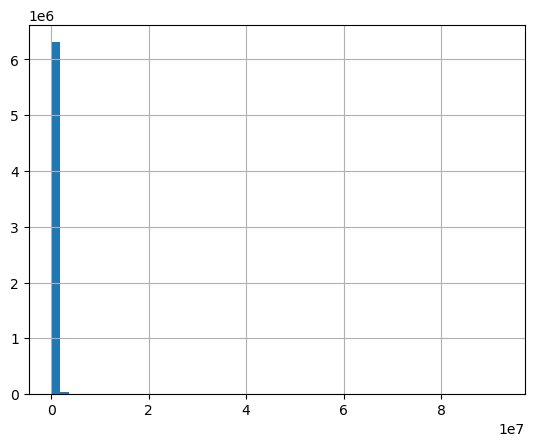

In [22]:
df['amount'].hist(bins=50)

### ✅ How to Fix It: Zoom into Realistic Amounts
Use a filter or limit the x-axis to see the meaningful range:

In [24]:
import matplotlib.pyplot as plt


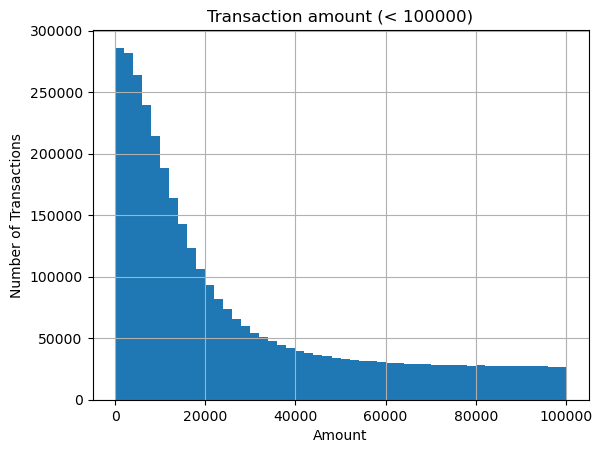

In [25]:
# plot trasaction under 100000 to avoid skew from outliers
df[df['amount'] < 100000]['amount'].hist(bins=50)
plt.title("Transaction amount (< 100000)")
plt.xlabel("Amount")
plt.ylabel("Number of Transactions")
plt.show()

### Compare Fraud vs Non-Fraud

In [27]:
import seaborn as sns

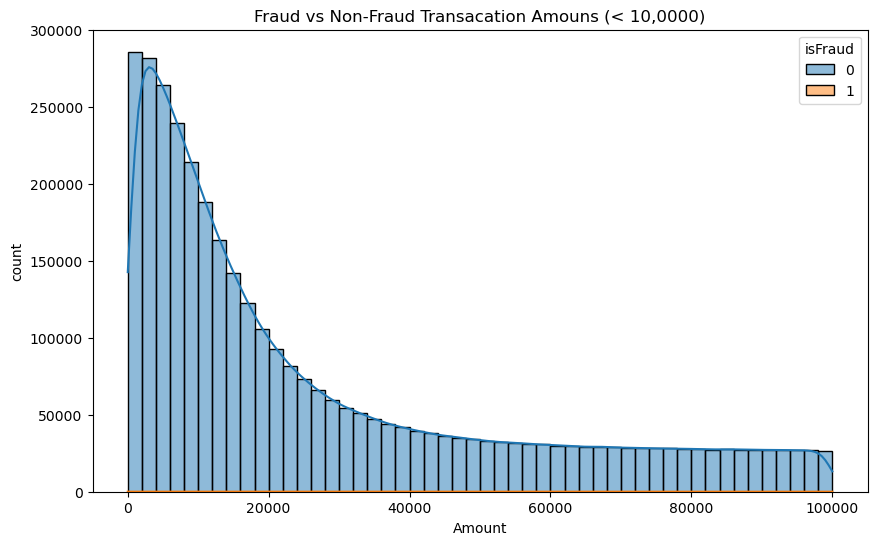

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['amount']<100000],x='amount',hue='isFraud',bins=50,kde=True)
plt.title("Fraud vs Non-Fraud Transacation Amouns (< 10,0000)")
plt.xlabel("Amount")
plt.ylabel("count")
plt.show()

<Axes: xlabel='amount', ylabel='Density'>

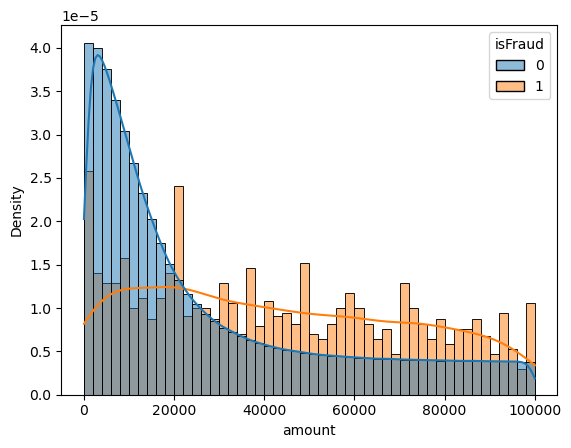

In [29]:
sns.histplot(data=df[df['amount'] < 100000], 
             x='amount', 
             hue='isFraud', 
             bins=50, 
             kde=True, 
             stat='density', 
             common_norm=False)

## Step 3: Define Rule-Based Fraud Detection Logic 

Act as a  fraud analyst — identifying suspicious patterns based on rules and behavior, without using machine learning yet.

🔍 Let’s Create Rules Based on Observations

Here are 5 common rules we can define (customizable to your dataset):

#### 📌 Rule 1: High Transaction Amount

In [33]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [34]:
#Flag Transaction over 200,000
df['rule_high_amount'] = df['amount'] > 200000

### 📌 Rule 2: TRANSFER or CASH_OUT Type with Balance Anomalies

In [36]:
df['rule_suspecious_type'] =( 
 (df['type'].isin(['TRANSFER','CASH_OUT']) ) &
    (df['oldbalanceOrg'] == 0) &
    (df['newbalanceOrig'] == 0)
)

### 📌 Rule 3: Sender Has No Funds but Makes a Transaction

In [38]:
df['rule_zero_balance_sender'] = (
 (df['oldbalanceOrg'] == 0) &
    (df['amount'] > 0)
)

### 📌 Rule 4: Destination Account Balance Jump Without History

In [40]:
df['rule_jump_balance_dest'] = (
    (df['oldbalanceOrg'] == 0) &
    (df['newbalanceOrig'] > 0 ) &
    (df['amount']  > 0 )
)

### 📌 Rule 5: System Flagged It as Fraud

In [42]:
df['rule_flagged_by_system'] = df['isFlaggedFraud'] == 1

### ✅ Combine Rules to Predict Suspicious Transactions

In [44]:
df['isSuspicious']  = (
    df['rule_high_amount'] |
    df['rule_suspecious_type'] |
    df['rule_zero_balance_sender'] |
    df['rule_jump_balance_dest'] 

)


In [45]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,rule_high_amount,rule_suspecious_type,rule_zero_balance_sender,rule_jump_balance_dest,rule_flagged_by_system,isSuspicious
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,False,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,False,False,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,False,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,False,False,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,True,False,False,False,False,True
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,True,False,False,False,False,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,True,False,False,False,False,True
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,True,False,False,False,False,True


In [46]:
from sklearn.metrics import classification_report

print(classification_report(df['isFraud'], df['isSuspicious']))

              precision    recall  f1-score   support

           0       1.00      0.50      0.66   6354407
           1       0.00      0.67      0.00      8213

    accuracy                           0.50   6362620
   macro avg       0.50      0.58      0.33   6362620
weighted avg       1.00      0.50      0.66   6362620



In [76]:
df['isSuspicious'] = ((df['type'] == 'TRANSFER') & (df['amount'] > 2000000)).astype(int)

# 📊 Step 4.1: Generate a Confusion Matrix

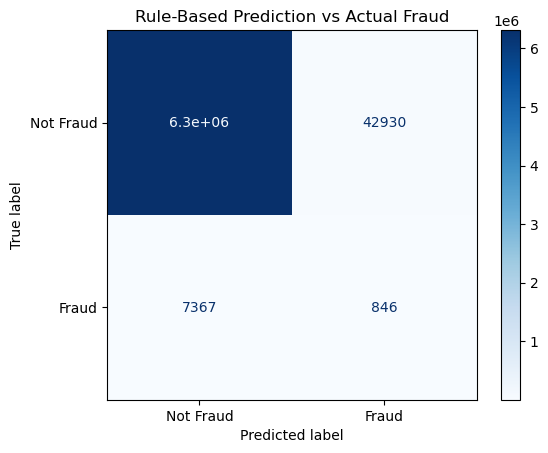

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Actual vs Predicted
y_true = df['isFraud']
y_pred = df['isSuspicious']

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])

# Plot
disp.plot(cmap="Blues")
plt.title("Rule-Based Prediction vs Actual Fraud")
plt.show()

### Here’s how many frauds actually existed vs how many my rule could catch.”

# 📊 Step 4.2: Bar Chart Comparing Actual vs Detected Frauds

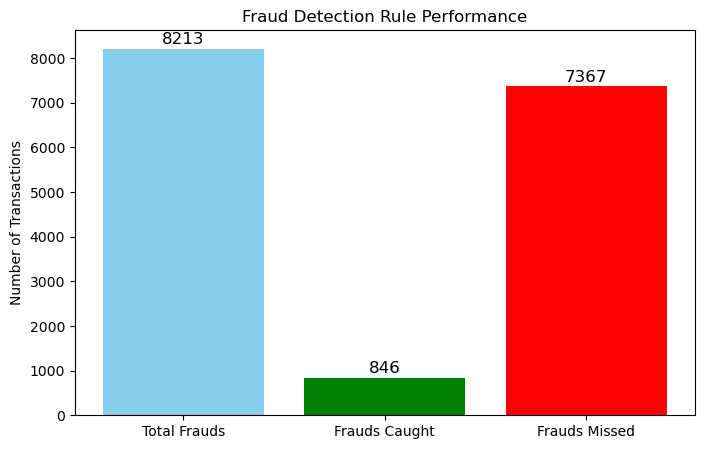

In [84]:
import matplotlib.pyplot as plt

# Count actual frauds
total_frauds = df[df['isFraud'] == 1].shape[0]

# Count frauds correctly detected by the rule
caught_frauds = df[(df['isFraud'] == 1) & (df['isSuspicious'] == 1)].shape[0]

# Count frauds missed by the rule
missed_frauds = df[(df['isFraud'] == 1) & (df['isSuspicious'] == 0)].shape[0]

# Plotting
labels = ['Total Frauds', 'Frauds Caught', 'Frauds Missed']
values = [total_frauds, caught_frauds, missed_frauds]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['skyblue', 'green', 'red'])
plt.title("Fraud Detection Rule Performance")
plt.ylabel("Number of Transactions")

# Adding value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100, '%d' % int(height), ha='center', fontsize=12)

plt.show()
